## Scipy Signal Processing Example
- https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.signal import freqz, butter, firwin, lfilter

In [4]:
# Parameter
T = 0.2      # Sample Period
F_S = 480    # Sampling frequency
F0 = 120     # Nominal frequency
N = 8       # BPF Order
F_CUT_L = 80   # Cutoff frequency (Low)
F_CUT_H = 140  # Cutoff frequency (High)

### Frequency Response

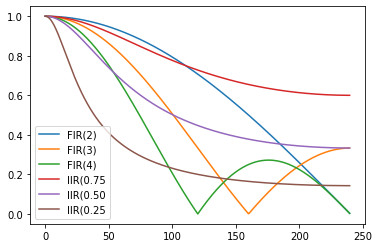

In [27]:
# FIR Filter
for flen in [2, 3, 4]:
    b_fir = np.ones((flen, )) / flen
    w_fir, h_fir = freqz(b_fir)
    plt.plot(F_S / (2 * np.pi) * w_fir, abs(h_fir), label='FIR(%d)' % flen)


# IIR Filter
for iir_str in [0.75, 0.5, 0.25]:
    a_iir = [1, -(1 - iir_str)]
    b_iir = [iir_str]
    w_iir, h_iir = freqz(b_iir, a_iir)
    plt.plot(F_S / (2 * np.pi) * w_iir, abs(h_iir), label='IIR(%.2f' % iir_str)
plt.legend()

### Bandpass Filter

In [2]:
# FIR
def firwin_bpf(cutoff_l, cutoff_h, fs, order=5):
    return firwin(order, [cutoff_l / (0.5 * fs), cutoff_h / (0.5 * fs)], pass_zero='bandpass')

In [3]:
# IIR
def butter_bpf(cutoff_l, cutoff_h, fs, order=5):
    return butter(order, [cutoff_l / (0.5 * fs), cutoff_h / (0.5 * fs)], btype='bandpass')

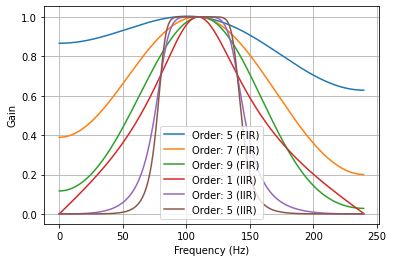

In [5]:
# Show frequency responce of different order
for order in [5, 7, 9]:
    b = firwin_bpf(F_CUT_L, F_CUT_H, F_S, order)
    w, h = freqz(b)
    plt.plot(F_S / (2 * np.pi) * w, abs(h), label='Order: %d (FIR)' % order)

for order in [1, 3, 5]:
    b, a = butter_bpf(F_CUT_L, F_CUT_H, F_S, order)
    w, h = freqz(b, a)
    plt.plot(F_S / (2 * np.pi) * w, abs(h), label='Order: %d (IIR)' % order)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend()

In [6]:
# Prepare noisy signal
n_sample = int(T * F_S)
t = np.linspace(0, T, n_sample)

x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 40 * t + 0.1)
x += 0.02 * np.cos(2 * np.pi * F0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 200 * t)

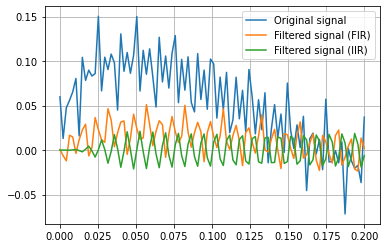

In [7]:
# BPF
b1 = firwin_bpf(F_CUT_L, F_CUT_H, F_S, N)
b2, a2 = butter_bpf(F_CUT_L, F_CUT_H, F_S, N)

plt.plot(t, x, label='Original signal')
plt.plot(t, lfilter(b1, [1], x), label='Filtered signal (FIR)')
plt.plot(t, lfilter(b2, a2, x), label='Filtered signal (IIR)')

plt.grid(True)
plt.legend()